In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d
from matplotlib.ticker import MaxNLocator


def AVERAGE(data,factor = 0.3):
    return(gaussian_filter1d(np.array(data), sigma=factor))
    
def sd_format_plot(result, types_lin = None):
    mean , sd = np.mean(result,axis= 0), np.std(result,axis= 0)
    x = range(1,len(mean) + 1)
    if types_lin:
        plt.plot(x, mean,types_lin) 
    else:
        plt.plot(x, mean) 
    plt.fill_between(x, mean - sd, mean + sd, alpha=0.25)


In [2]:
from main import train_loop
num = 5
full_result = train_loop(num)

======Start======
======Train id: 0 ======
Epoch: 0 P Loss: 10.351604577691626
Social Welfare of Episode  0 , (nu, random): 23.195893725401163
Social Welfare of Episode  0 , (nu, pi): 23.195893725401163
Social Welfare of Episode  0 , (nu, pi*(nu)): 34.80349584390366
Social Welfare of Episode  0 , (nu*(nu), pi*(nu*(nu))): 34.80354466683837
Epoch: 1 P Loss: 10.214762621129609
Social Welfare of Episode  1 , (nu, random): 23.1579533989526
Social Welfare of Episode  1 , (nu, pi): 23.158128938112192
Social Welfare of Episode  1 , (nu, pi*(nu)): 34.7429234476534
Social Welfare of Episode  1 , (nu*(nu), pi*(nu*(nu))): 34.74293661893348
Epoch: 2 P Loss: 10.113098562195411
Social Welfare of Episode  2 , (nu, random): 23.178955769874943
Social Welfare of Episode  2 , (nu, pi): 23.179242397419948
Social Welfare of Episode  2 , (nu, pi*(nu)): 34.70894349889977
Social Welfare of Episode  2 , (nu*(nu), pi*(nu*(nu))): 34.70906048812863
Epoch: 3 P Loss: 10.00860188086411
Social Welfare of Episode  3 , 

7
['nu_pi_perform', 'nu_random_perform', 'nu_piopt_perform', 'nuopt_pioptnuopt_perform', 'R_planner', 'R_random', 'R_total']


Text(0,0.5,'Regret')

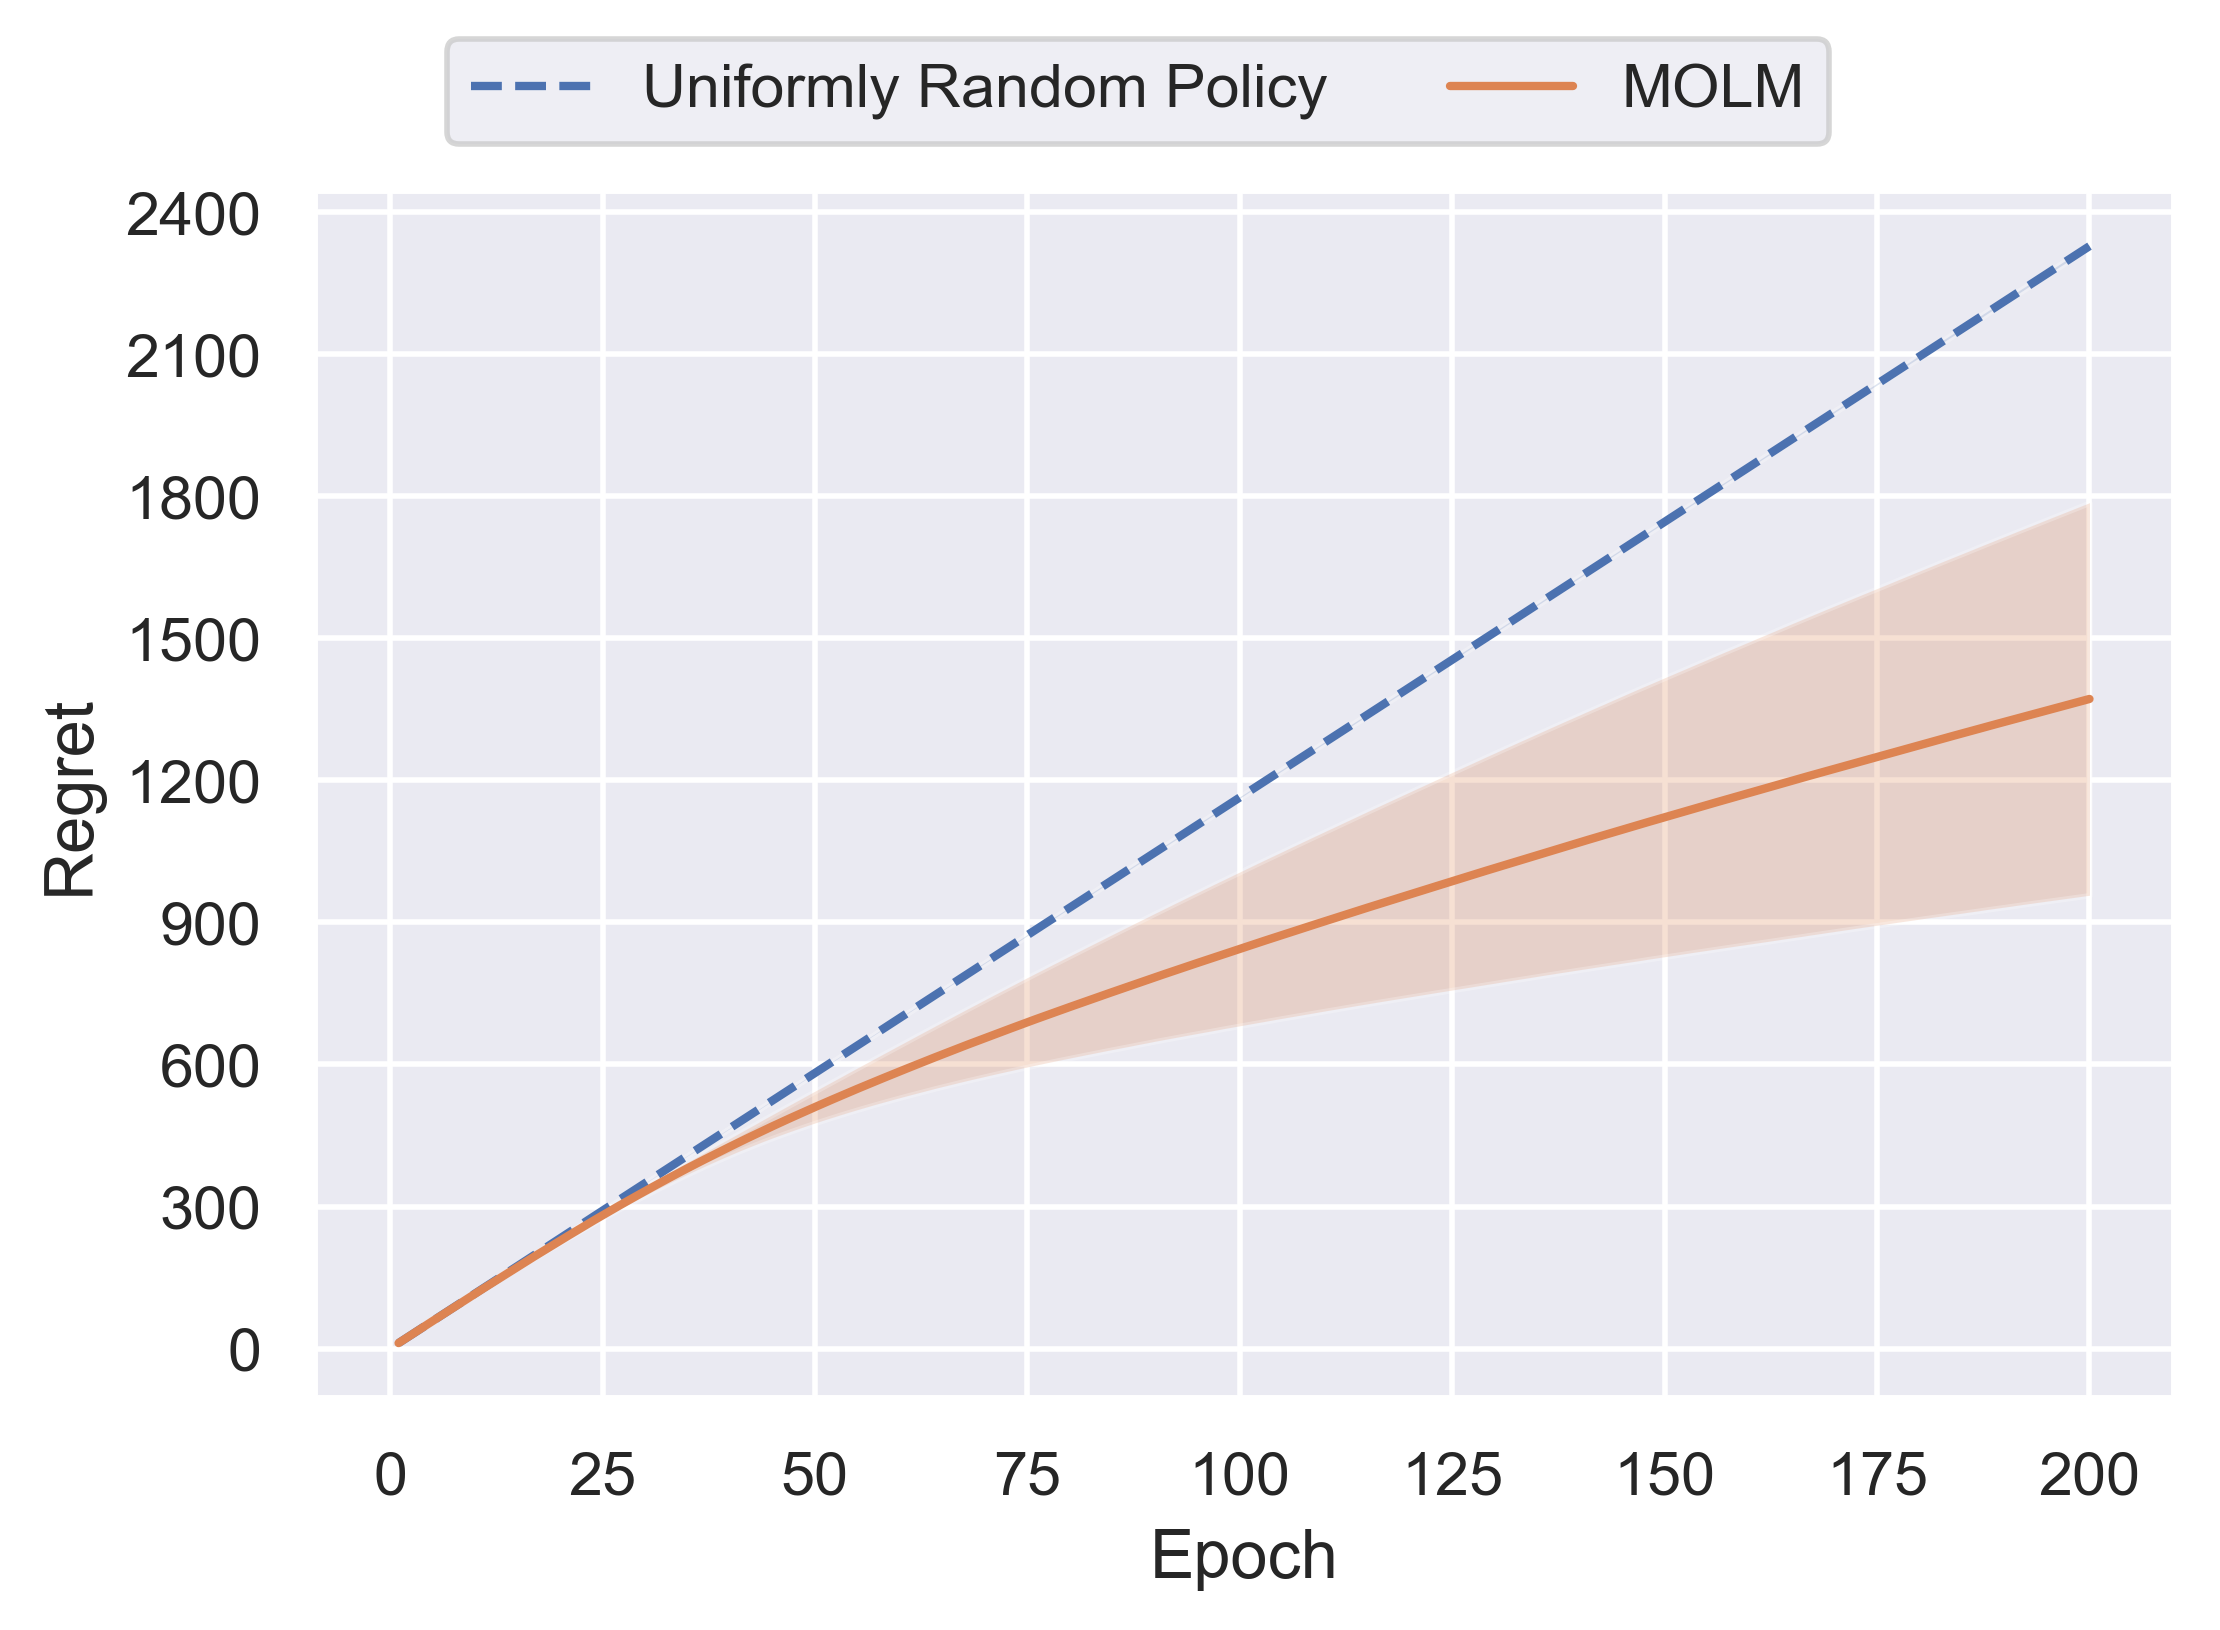

In [13]:
plt.figure(figsize=(6, 4), dpi = 400)
sns.set(style="darkgrid")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

print(len(full_result))

keys = list(full_result.keys())
print(keys)

full_result['nu_random_perform'] = AVERAGE(full_result['nu_random_perform'])
full_result['nu_pi_perform'] = AVERAGE(full_result['nu_pi_perform'])
full_result['nuopt_pioptnuopt_perform'] = AVERAGE(full_result['nuopt_pioptnuopt_perform'])

sd_format_plot(full_result['R_random'],'--')
sd_format_plot(full_result['R_total'])

plt.legend(['Uniformly Random Policy', 'MOLM'], ncol = len(keys), loc='upper left', bbox_to_anchor=(0.055, 1.15))
plt.xlabel('Epoch')
plt.ylabel('Regret')